In [80]:
from skimage import io

import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [24]:
sites_df = pd.read_csv('./2023-01-17/sites.csv')

In [25]:
sites_df

,x,y
0,82,76
1,116,77
2,117,111
3,150,110
4,150,75
...,...,...
103,82,180
104,85,146
105,48,147
106,49,112


In [82]:
for i in range(1, 16):
    if i < 10:
        filename = './2023-01-17/pict_00' + str(i)
    elif i < 100:
        filename = './2023-01-17/pict_0' + str(i)
    else:
        filename = './2023-01-17/pict_' + str(i)
    image = io.imread(filename+'.png')
    image_bw = io.imread(filename+'_bw'+'.png')

In [83]:
occupied_arr = np.zeros(len(sites_df), dtype='int')
for i in range(len(sites_df)):
    x = sites_df.iloc[i]['x']
    y = sites_df.iloc[i]['y']
    # Decide that the site is occupied or not
    # Note that the x's correspond to columns of the matrix !
    # and the y's correspond to rows of the matrix !
    if np.mean(image_bw[y-6:y+6, x-6:x+6]) < 150:
        occupied_arr[i] = 1

In [84]:
sites_df['occupied'] = occupied_arr

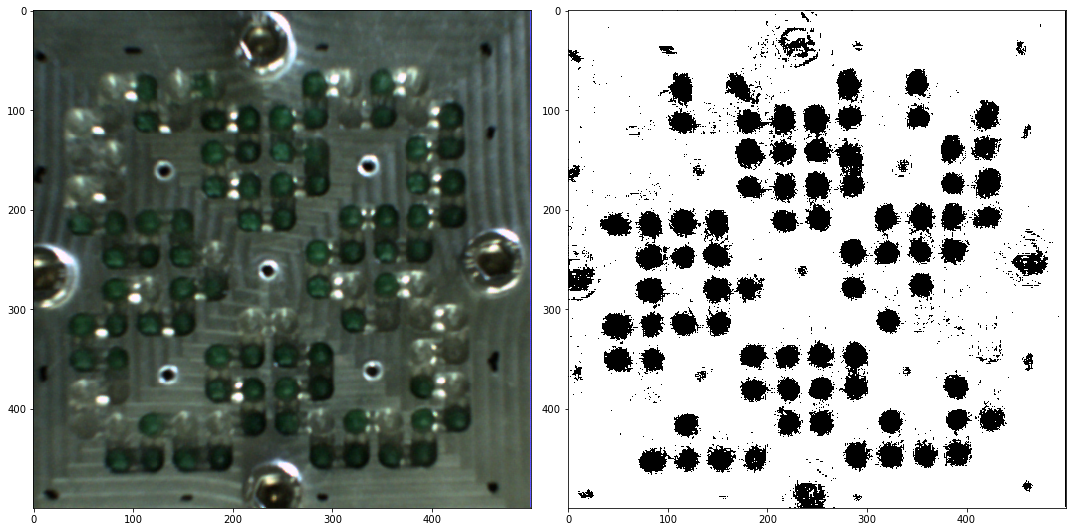

In [85]:
plt.figure(figsize=(15, 15))
plt.subplot(121)
io.imshow(image)
plt.subplot(122)
io.imshow(image_bw)
plt.show()

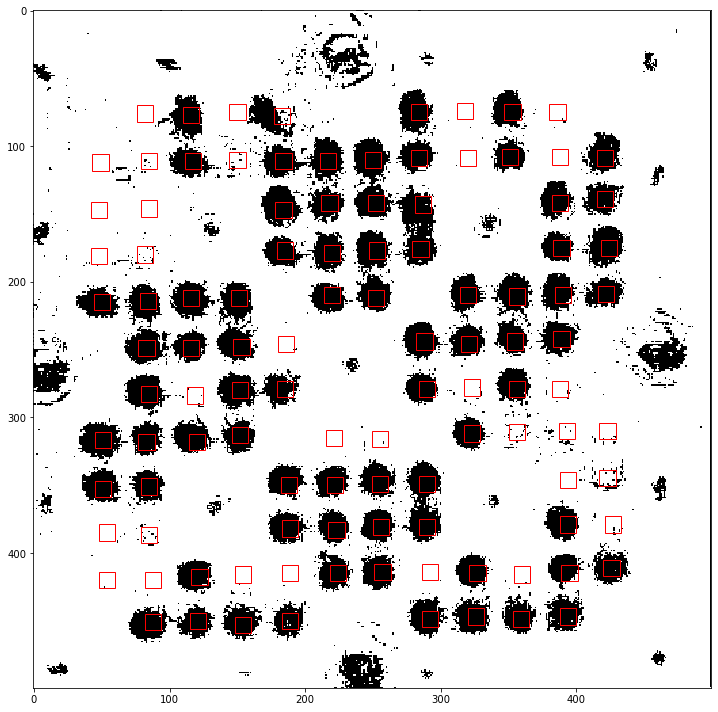

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))
io.imshow(image_bw)

for i in range(len(sites_df)):
    x = sites_df.iloc[i]['x']
    y = sites_df.iloc[i]['y']
    ax.add_patch(Rectangle((x-6, y-6), 12, 12, fill=False, color='r'))
plt.show()

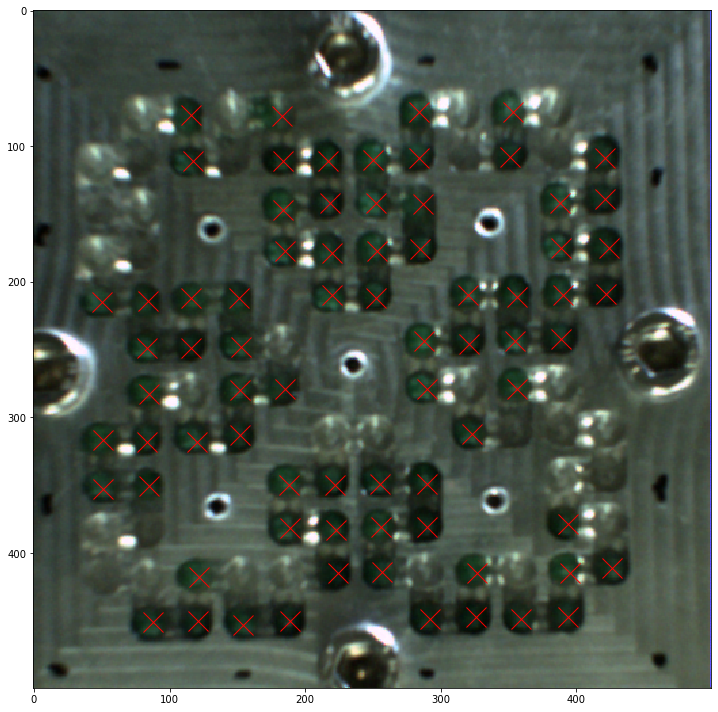

In [87]:
plt.figure(figsize=(10, 10))
io.imshow(image)

for i in range(len(sites_df)):
    x = sites_df.iloc[i]['x']
    y = sites_df.iloc[i]['y']
    occupied_flag = sites_df.iloc[i]['occupied']
    if occupied_flag == 1:
        plt.plot(x, y, 'rx', markersize=20)
plt.show()